##### Decision Tree Assignment

##### About the data: 

Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows:   
 Sales -- Unit sales (in thousands) at each location  
 Competitor Price -- Price charged by competitor at each location  
 Income -- Community income level (in thousands of dollars)  
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)  
 Population -- Population size in region (in thousands)  
 Price -- Price company charges for car seats at each site  
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site  
 Age -- Average age of the local population  
 Education -- Education level at each location  
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location  
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not  


The company dataset looks like this: 
 
##### Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


##### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree, metrics, preprocessing    
from sklearn.tree import  DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

##### Reading the dataset

In [2]:
company = pd.read_csv('Company_Data.csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


##### Checking the shape of the dataset

In [3]:
company.shape

(400, 11)

##### Checking for null values

In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


##### Checking for duplicated values

In [5]:
company[company.duplicated(keep = False)]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


##### Checking for outliers using boxplot

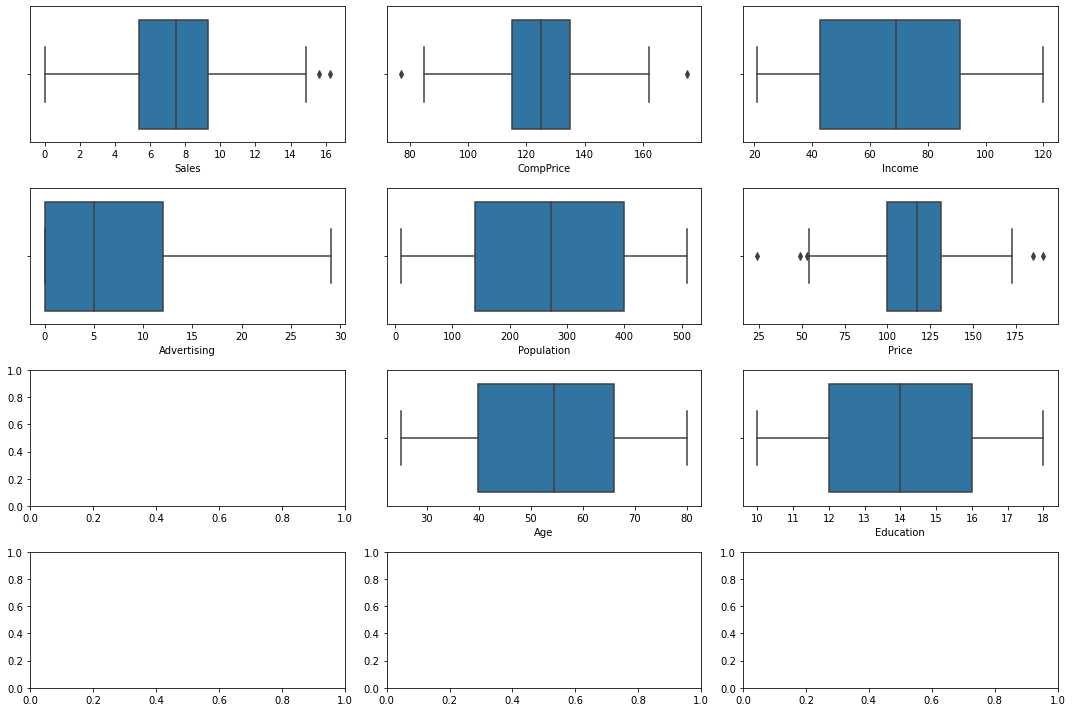

In [7]:
fig, ax = plt.subplots(4, 3, figsize = (15,10))

sns.boxplot(company.Sales, ax = ax[0, 0])
sns.boxplot(company.CompPrice, ax = ax[0, 1])
sns.boxplot(company.Income, ax = ax[0, 2])
sns.boxplot(company.Advertising, ax = ax[1, 0])
sns.boxplot(company.Population, ax = ax[1, 1])
sns.boxplot(company.Price, ax = ax[1, 2])
sns.boxplot(company.Age, ax = ax[2, 1])
sns.boxplot(company.Education, ax = ax[2, 2])

plt.tight_layout()
plt.show()

##### Take high sales above at 7.49 beacause it is the mean of sales

In [8]:
company['sales'] = (company['Sales'] > 7.49)*1

##### find the outliers in each of the column

In [9]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(company[item]))

Outliers: 

Sales :  (array([316, 376], dtype=int64),)
CompPrice :  (array([ 42, 310], dtype=int64),)
Income :  (array([], dtype=int64),)
Advertising :  (array([], dtype=int64),)
Population :  (array([], dtype=int64),)
Price :  (array([ 42, 125, 165, 174, 367], dtype=int64),)
Age :  (array([], dtype=int64),)
Education :  (array([], dtype=int64),)


##### Checking the skewness and kurtosis

In [10]:
col = company.select_dtypes(exclude = 'object').columns.tolist()

data = company[col]
pd.DataFrame(data = [data.skew(), data.kurtosis()],index = ['skewness', 'kurtosis'])

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,sales
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007,0.010038
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332,-2.009974


##### Encode columns into numeric

In [11]:
for column in company.columns:
    le = LabelEncoder()
    company[column] = le.fit_transform(company[column])

In [12]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,255,49,51,11,141,54,0,17,7,1,1,1
1,297,22,27,16,129,18,1,40,0,1,1,1
2,267,24,14,10,138,15,2,34,2,1,1,1
3,158,28,77,4,249,31,2,30,4,1,1,0
4,37,52,42,3,178,62,0,13,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,320,49,85,17,104,62,1,8,4,1,1,1
396,114,50,2,3,17,54,2,30,1,0,1,0
397,159,71,5,12,195,91,2,15,8,1,1,0
398,106,12,57,7,145,29,0,25,2,1,1,0


##### Correlation 

In [13]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize = (12, 10 ))
    cmap = sns.diverging_palette(240, 10, as_cmap = True)
    _ = sns.heatmap(corr, cmap = cmap, square = True, cbar_kws = {'shrink' : .9}, ax = ax, annot = True, annot_kws = {'fontsize' : 12})

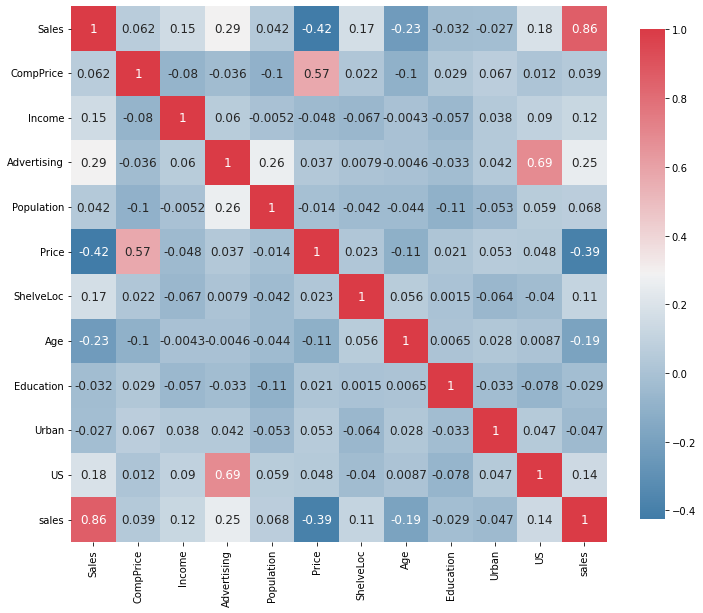

In [14]:
plot_correlation_map(company)

In [15]:
company.shape

(400, 12)

##### Splitting the data into dependent and indepandent variables.

In [16]:
x = company.iloc[:, 1:11]
y = company.iloc[:, 11]

##### Splitting the data in test and train

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

In [18]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(320, 10) (80, 10) (320,) (80,)


In [19]:
y_train.value_counts()

0    162
1    158
Name: sales, dtype: int64

##### Building Decision Tree Classifier using entropy criteria

In [20]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

##### Plot the decision tree

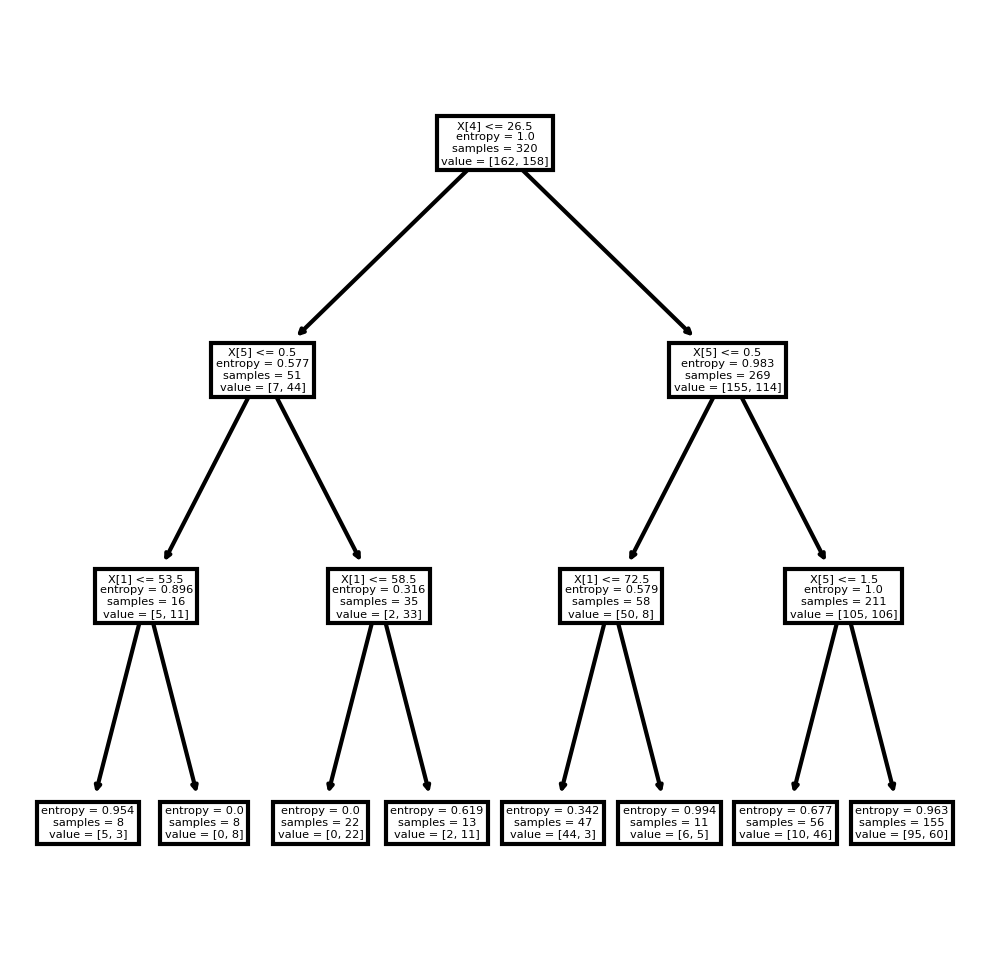

In [21]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4), dpi = 300)
tree.plot_tree(model);

##### Visualizing how the data is choosing the root node and how it is built

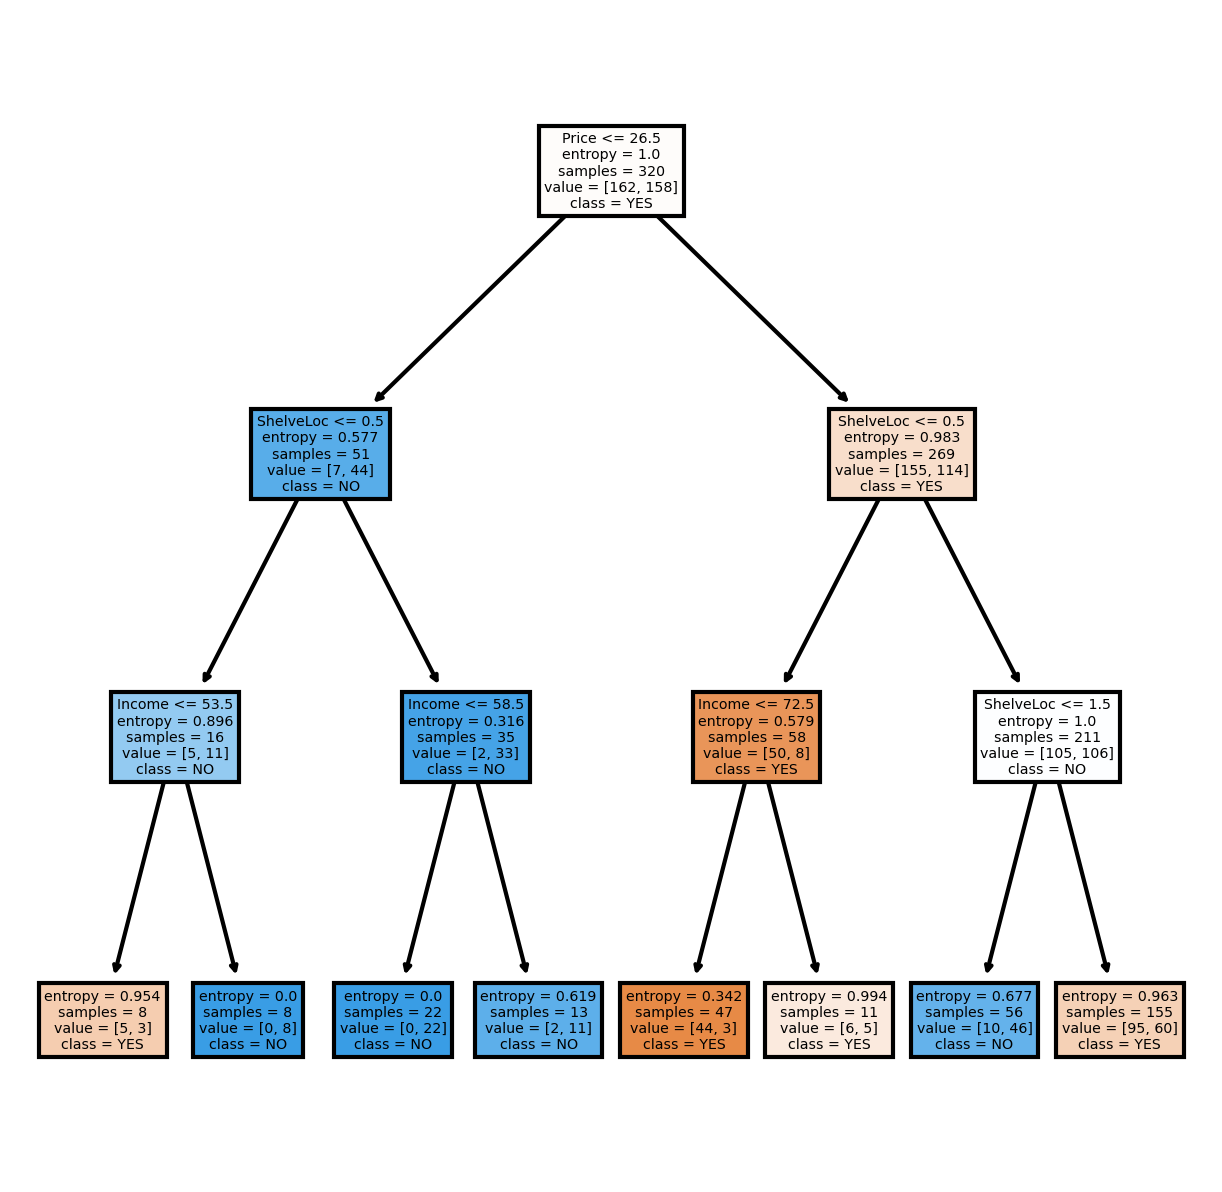

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi = 300)
tree.plot_tree(model, 
               feature_names = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','income'], 
               class_names = ['YES','NO'], 
               filled = True);

##### Checking the score of the training data

In [23]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.740625

##### Predicting on test data

In [24]:
model_test = model.predict(x_test) #predicting on test data set
pd.Series(model_test).value_counts() #getting the count of each category

0    58
1    22
dtype: int64

In [25]:
model_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':model_test})
df

,Actual,Predicted
10,1,0
382,0,0
374,1,0
196,0,0
47,0,0
...,...,...
336,0,0
398,0,0
45,0,0
373,0,0


##### Getting the 2 way table to understand the correct and wrong predictions

In [27]:
pd.crosstab(y_test, model_test)

col_0,0,1
sales,,
0,36,3
1,22,19


##### Accuracy 

In [28]:
np.mean(model_test == y_test)

0.6875

##### Plot Functions

In [29]:
def plot_confusion_metrix(y_test, model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Wistia)
    classNames = ['YES', 'NO']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [30]:
def report_performance(model):

    model_test = model.predict(x_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

In [31]:
def roc_curves(model):
    predictions_test = model.predict(x_test)
    fpr, tpr, thresholds = roc_curve(predictions_test, y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color = 'darkorange', lw = 1, label = 'ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = "lower right")
    plt.show()

In [32]:
def accuracy(model):
    pred = model.predict(x_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")

##### Visualization



Confusion Matrix:
[[36  3]
 [22 19]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.92      0.74        39
           1       0.86      0.46      0.60        41

    accuracy                           0.69        80
   macro avg       0.74      0.69      0.67        80
weighted avg       0.75      0.69      0.67        80



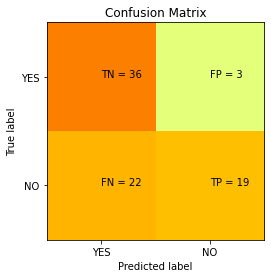

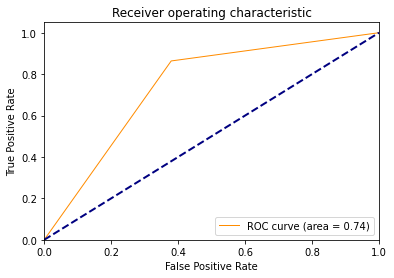


Acuuracy Of the Model:  0.6875 




In [33]:
report_performance(model) 
roc_curves(model)
accuracy(model)

##### Creating a for loop to identify the train and test accuracies of the prediction, with the change in the max_depth feature of the decision tree classifier from 1 to 11

In [34]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state = 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

##### Listing down the Accuracies in a Dataframe for different max depth classifiers

In [35]:
acc = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
acc

,max_depth,train_acc,test_acc
0,1,0.621875,0.6000
1,2,0.625000,0.6750
2,3,0.740625,0.6875
3,4,0.768750,0.7375
4,5,0.871875,0.7750
5,6,0.887500,0.7875
6,7,0.906250,0.7250
7,8,0.943750,0.7500
8,9,0.962500,0.8125
9,10,0.978125,0.7750


- Maximum test accuracy of 81.25% is when the depth of the Decision Tree is 9

##### Visulizing accuracy graph to look over max_depth

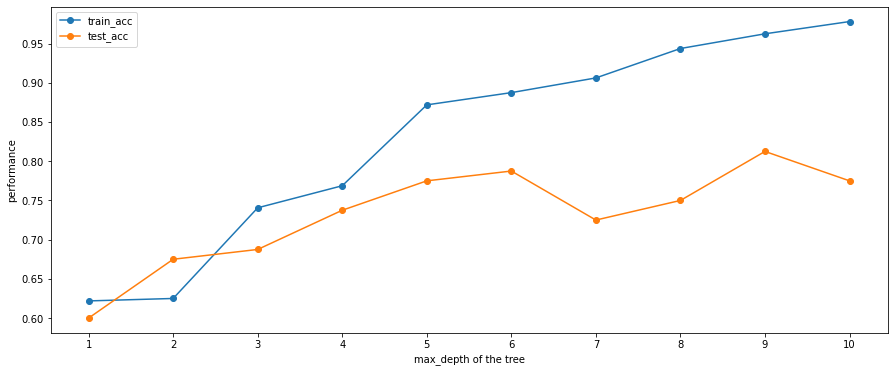

In [36]:
labels = ['train_acc','test_acc']
fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot()
plt.plot(acc['max_depth'],acc['train_acc'], marker = 'o')
plt.plot(acc['max_depth'], acc['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

##### Building DecisionTreeClassifier (CART) using Gini Criteris

In [37]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

###### Prediction and computing the accuracy

In [38]:
preds = model_gini.predict(x_test)
np.mean(preds == y_test)

0.7125

##### Running the DecisionTreeClassifier on whole Data

In [39]:
model_gini = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
model_gini.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

##### Predicition and computing the accuracy

In [40]:
preds = model_gini.predict(x)
np.mean(preds == y)

0.73

In [41]:
pd.crosstab(y,preds)

col_0,0,1
sales,,
0,186,15
1,93,106


##### Decision Tree Regression

In [42]:
model_r = DecisionTreeRegressor()
model_r.fit(x_train, y_train)

DecisionTreeRegressor()

In [43]:
model_r.score(x_train, y_train)

1.0

##### Find the accuracy

In [44]:
model_r.score(x_test, y_test)

0.24953095684803017

- Decision tree classfier gives a good result.
- Decision tree regresser is not an advisable method to classify the salary data

In [45]:
model.feature_importances_

array([0.16904424, 0.13998639, 0.10053299, 0.02753732, 0.30675637,
       0.15961582, 0.06327239, 0.03325448, 0.        , 0.        ])

In [46]:
feature_importances = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_importances

,feature,importance
4,Price,0.306756
0,CompPrice,0.169044
5,ShelveLoc,0.159616
1,Income,0.139986
2,Advertising,0.100533
6,Age,0.063272
7,Education,0.033254
3,Population,0.027537
8,Urban,0.000000
9,US,0.000000


##### Conclusion

- As seen from the table Price plays a important rule in sale of a product